# FRED-API-DEMO

Für die Nutzung der API ist ein Key notwending. Hierzu muss man sich registrieren und den Key beantragen. Das funtkioniert sofort und ohne Prüfung.

In [77]:
key="3547feb4e6f6e4e74faf78d167ffe9d3"

## Imports

In [78]:
import requests
import pandas as pd
import matplotlib as plt

## Settings

In [79]:
%matplotlib inline

plt.style.use('fivethirtyeight')

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

## XML-Syntax

In [80]:
url = f"https://api.stlouisfed.org/fred/category?category_id=125&api_key={key}"

response = requests.get(url)
display(response.status_code)
display(response.content)

200

b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n<category id="125" name="Trade Balance" parent_id="13"/>\n</categories>'

## JSON-Syntax

### Basic

Es sieht so aus, als ob die Metadaten einer Timeseries serparat von den Observationen abzufragen sind. Die folgende Abfrage liefert die Metadaten zum "Real Gross National Product".

In [81]:
url = f"https://api.stlouisfed.org/fred/series?series_id=GNPCA&api_key={key}&file_type=json"

response = requests.get(url)
display(response.status_code)
display(response.content)
display(response.json())

200

b'{"realtime_start":"2022-07-22","realtime_end":"2022-07-22","seriess":[{"id":"GNPCA","realtime_start":"2022-07-22","realtime_end":"2022-07-22","title":"Real Gross National Product","observation_start":"1929-01-01","observation_end":"2021-01-01","frequency":"Annual","frequency_short":"A","units":"Billions of Chained 2012 Dollars","units_short":"Bil. of Chn. 2012 $","seasonal_adjustment":"Not Seasonally Adjusted","seasonal_adjustment_short":"NSA","last_updated":"2022-03-30 07:55:26-05","popularity":15,"notes":"BEA Account Code: A001RX\\n\\n"}]}'

{'realtime_start': '2022-07-22',
 'realtime_end': '2022-07-22',
 'seriess': [{'id': 'GNPCA',
   'realtime_start': '2022-07-22',
   'realtime_end': '2022-07-22',
   'title': 'Real Gross National Product',
   'observation_start': '1929-01-01',
   'observation_end': '2021-01-01',
   'frequency': 'Annual',
   'frequency_short': 'A',
   'units': 'Billions of Chained 2012 Dollars',
   'units_short': 'Bil. of Chn. 2012 $',
   'seasonal_adjustment': 'Not Seasonally Adjusted',
   'seasonal_adjustment_short': 'NSA',
   'last_updated': '2022-03-30 07:55:26-05',
   'popularity': 15,
   'notes': 'BEA Account Code: A001RX\n\n'}]}

### Timeseries

Die tatsächlichen Observationen bekommt man dann über die folgende Abfrage.

In [82]:
url = f"https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key={key}&file_type=json"

response = requests.get(url)
display(response.status_code)
display(response.content)
display(response.json())

200

b'{"realtime_start":"2022-07-22","realtime_end":"2022-07-22","observation_start":"1600-01-01","observation_end":"9999-12-31","units":"lin","output_type":1,"file_type":"json","order_by":"observation_date","sort_order":"asc","count":93,"offset":0,"limit":100000,"observations":[{"realtime_start":"2022-07-22","realtime_end":"2022-07-22","date":"1929-01-01","value":"1120.718"},{"realtime_start":"2022-07-22","realtime_end":"2022-07-22","date":"1930-01-01","value":"1025.678"},{"realtime_start":"2022-07-22","realtime_end":"2022-07-22","date":"1931-01-01","value":"958.927"},{"realtime_start":"2022-07-22","realtime_end":"2022-07-22","date":"1932-01-01","value":"834.769"},{"realtime_start":"2022-07-22","realtime_end":"2022-07-22","date":"1933-01-01","value":"823.628"},{"realtime_start":"2022-07-22","realtime_end":"2022-07-22","date":"1934-01-01","value":"911.541"},{"realtime_start":"2022-07-22","realtime_end":"2022-07-22","date":"1935-01-01","value":"993.105"},{"realtime_start":"2022-07-22","real

{'realtime_start': '2022-07-22',
 'realtime_end': '2022-07-22',
 'observation_start': '1600-01-01',
 'observation_end': '9999-12-31',
 'units': 'lin',
 'output_type': 1,
 'file_type': 'json',
 'order_by': 'observation_date',
 'sort_order': 'asc',
 'count': 93,
 'offset': 0,
 'limit': 100000,
 'observations': [{'realtime_start': '2022-07-22',
   'realtime_end': '2022-07-22',
   'date': '1929-01-01',
   'value': '1120.718'},
  {'realtime_start': '2022-07-22',
   'realtime_end': '2022-07-22',
   'date': '1930-01-01',
   'value': '1025.678'},
  {'realtime_start': '2022-07-22',
   'realtime_end': '2022-07-22',
   'date': '1931-01-01',
   'value': '958.927'},
  {'realtime_start': '2022-07-22',
   'realtime_end': '2022-07-22',
   'date': '1932-01-01',
   'value': '834.769'},
  {'realtime_start': '2022-07-22',
   'realtime_end': '2022-07-22',
   'date': '1933-01-01',
   'value': '823.628'},
  {'realtime_start': '2022-07-22',
   'realtime_end': '2022-07-22',
   'date': '1934-01-01',
   'value':

### Als DataFrame

Alle Werte werden default als "object" geparsed. D.h. man muss sich auf jeden Fall Gedanken über die Datentypen machen. Leider hat json_normalize keinen Parameter für Datentypen, so dass es umständlich wird. Ich plädiere daher dafür, dass man die Timeseries, die man nutzen möchte, einmal ordentlich aufbereitet und dann direkt in einer DB ablegt, damit alle die saubere Series nutzen können.

In [83]:
df = pd.json_normalize(response.json(), record_path="observations")
df["realtime_start"] = pd.to_datetime(df["realtime_start"])
df["realtime_end"] = pd.to_datetime(df["realtime_end"])
df["date"] = pd.to_datetime(df["date"])
df["value"] = df["value"].astype(float)
df.head()

,realtime_start,realtime_end,date,value
0,2022-07-22,2022-07-22,1929-01-01,1120.718
1,2022-07-22,2022-07-22,1930-01-01,1025.678
2,2022-07-22,2022-07-22,1931-01-01,958.927
3,2022-07-22,2022-07-22,1932-01-01,834.769
4,2022-07-22,2022-07-22,1933-01-01,823.628


In [84]:
df.dtypes

realtime_start    datetime64[ns]
realtime_end      datetime64[ns]
date              datetime64[ns]
value                    float64
dtype: object

<AxesSubplot:title={'center':'Real Gross National Product'}, xlabel='date', ylabel='Billions of Chained 2012 Dollars'>

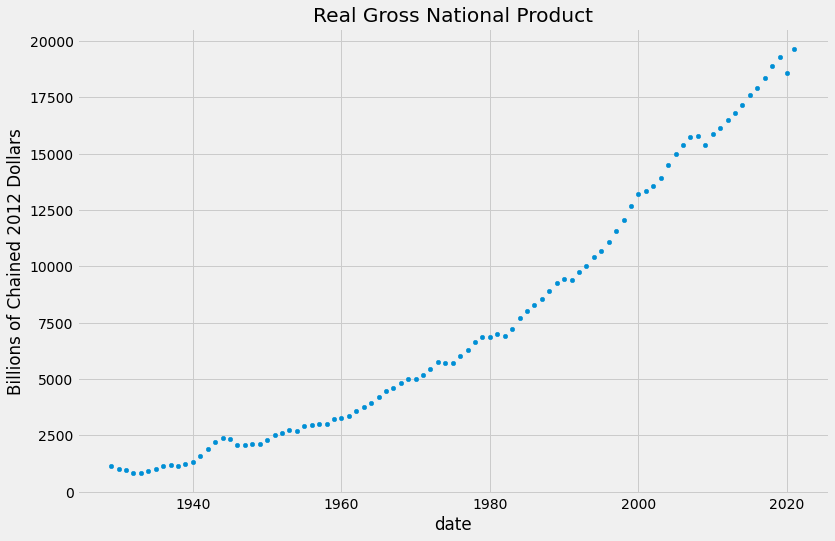

In [85]:
df.plot(
    x="date",
    y="value",
    kind="scatter",
    figsize=(12,8),
    title="Real Gross National Product",
    ylabel="Billions of Chained 2012 Dollars"
)